# Summer of Code - Artificial Intelligence

## Week 04: Exploratory Data Analysis

### Day 04: Data Visualization

In this notebook, we'll build from fundamentals of **visualization** to practical plotting in **Matplotlib** and **Seaborn**.


# Introduction to Data Visualization
## Visualization Libraries
- `Matplotlib`: low-level, flexible, foundation of Python plotting
- `Seaborn`: high-level statistical plotting, better defaults, integrates with pandas
- Others


In [1]:
!pip install matplotlib
!pip install seaborn

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt

<module 'matplotlib.pyplot' from 'c:\\Users\\DIPLAB\\.conda\\envs\\ul-env\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [4]:
import numpy as np
import pandas as pd

# Matplotlib Basics: Figure, Axes, and the Pyplot API

Matplotlib offers two primary interfaces:

- Pyplot state-machine (`plt.plot`, etc.) for quick scripts
- Object-oriented API (`fig, ax = plt.subplots()`) for control and composition


In [39]:
x = np.arange(-100, 100)
x[:10]

array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91])

In [40]:
squared = x ** 2
sin_values = np.sin(x)
cos_values = np.cos(x)
cubed = x ** 3

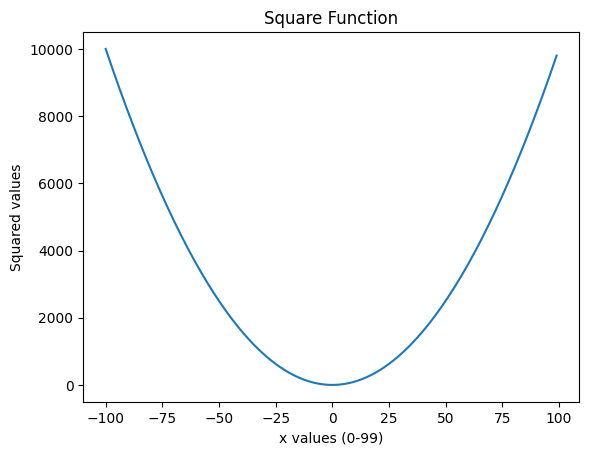

In [41]:
# line plot
plt.plot(x, squared)
plt.title("Square Function")
plt.xlabel("x values (0-99)")
plt.ylabel('Squared values')
plt.show()

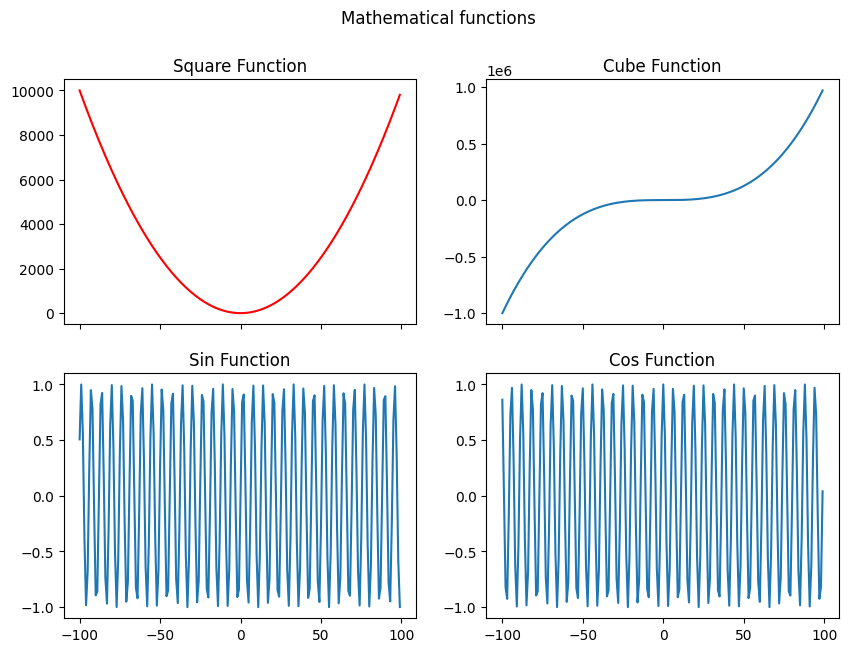

In [48]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7), sharex=True)
# Axes 0, 0
ax[0, 0].plot(x, squared, c="red")
ax[0, 0].set(title='Square Function')

# Axes 0, 1
ax[0, 1].plot(x, cubed)
ax[0, 1].set(title="Cube Function")

# Axes 1, 0
ax[1, 0].plot(x, sin_values)
ax[1, 0].set(title="Sin Function")

# Axes 0, 1
ax[1, 1].plot(x, cos_values)
ax[1, 1].set(title="Cos Function")


fig.suptitle("Mathematical functions")
plt.show()

# Quantitative Data Plots

Quantitative data are numeric.
## Scatter plot


In [50]:
# Load weights and heights data
!unzip ../../datasets/weights_and_heights.zip -d ../../datasets/

Archive:  ../../datasets/weights_and_heights.zip
  inflating: ../../datasets/SOCR-HeightWeight.csv  


In [4]:
hw = pd.read_csv(
    r'C:\Users\DIPLAB\Desktop\Summer of Code - AI\datasets\heights_and_weights.csv',
    index_col=0)
hw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 1 to 25000
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 585.9 KB


In [5]:
hw.head()

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


In [6]:
small_hw = hw.take(range(200)) # hw.sample(200)
small_hw.head()

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


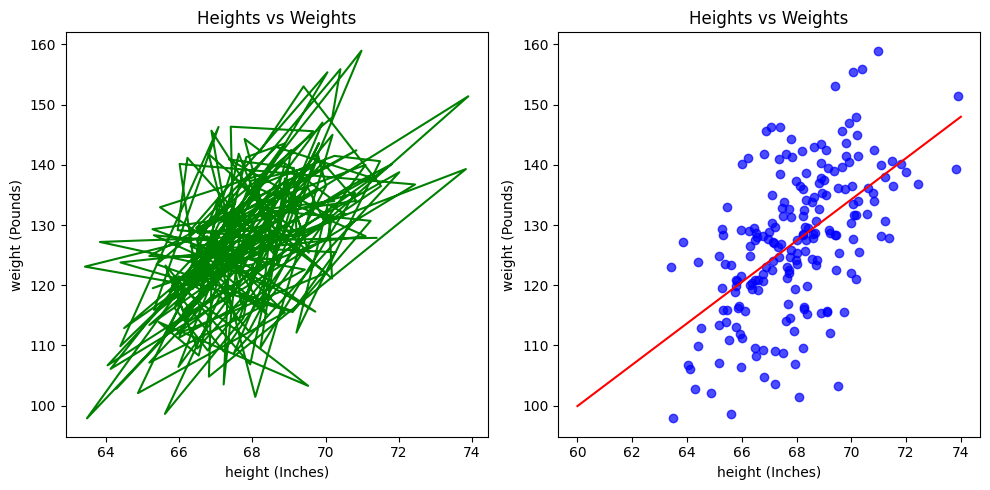

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(small_hw["Height(Inches)"], small_hw["Weight(Pounds)"], c="green")
ax[0].set(
    title="Heights vs Weights", xlabel="height (Inches)",
    ylabel="weight (Pounds)"
)

ax[1].scatter(small_hw["Height(Inches)"], small_hw["Weight(Pounds)"], c="blue",
              alpha=0.7)
ax[1].set(
    title="Heights vs Weights", xlabel="height (Inches)",
    ylabel="weight (Pounds)"
)

m, b = np.polyfit(small_hw["Height(Inches)"], small_hw["Weight(Pounds)"], 1)
ax[1].plot(np.arange(60, 75), m * np.arange(60, 75) + b, c='red')

plt.tight_layout()
plt.show()

In [100]:
small_hw.head()

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


## Histogram

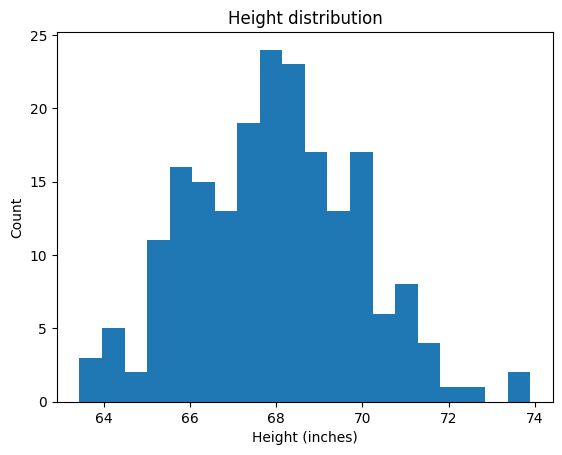

In [104]:
fig, ax = plt.subplots()
ax.hist(small_hw['Height(Inches)'], bins=20)
ax.set(title="Height distribution", xlabel="Height (inches)", ylabel="Count")
plt.show()

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

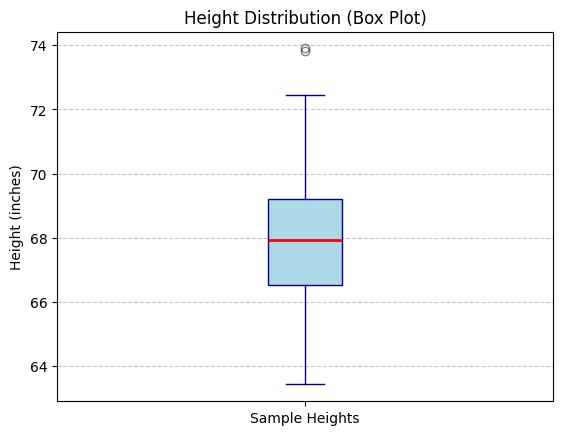

In [7]:
## Box plot - more informative
fig, ax = plt.subplots()
ax.boxplot(small_hw['Height(Inches)'], vert=True, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='navy'),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='navy'),
           capprops=dict(color='navy'),
           flierprops=dict(marker='o', color='orange', alpha=0.5))
ax.set(
    title="Height Distribution (Box Plot)",
    ylabel="Height (inches)",
    xticks=[1],
    xticklabels=["Sample Heights"]
)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Qualitative/Categorical Data Plots
Categorical data are discrete labels or groups.
## Bar plot


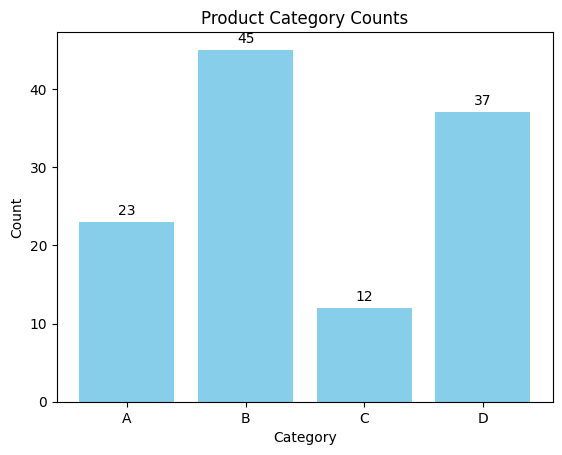

In [9]:
# Create synthetic categorical data for bar plot demonstration
categories = ["A", "B", "C", "D"]
counts = [23, 45, 12, 37]

fig, ax = plt.subplots()
ax.bar(categories, counts, color="skyblue")
ax.set(title="Product Category Counts", xlabel="Category", ylabel="Count")

# # Annotate bars with their values
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

## Pie chart

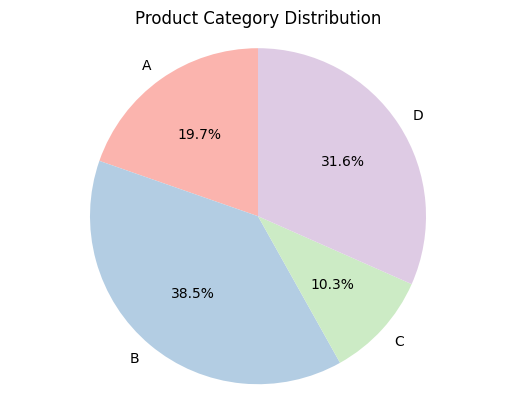

In [ ]:
# Pie chart for product category counts
fig, ax = plt.subplots()
ax.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
ax.set(title="Product Category Distribution")
ax.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()

# Introduction to Seaborn

Seaborn sits on top of Matplotlib to provide statistical plots with better defaults and pandas integration.
## Histplot: distribution of a quantitative variable
## Kdeplot: smoothed distribution
## Rugplot: distribution as ticks
## Pairplot: relationships between multiple quantitative variables
## Jointplot: combined scatter and distribution plots

## Matrix Plots (Heatmaps)

Matrix plots visualize values across a 2D grid. Common uses:

- Correlation matrices for feature relationships


# Exercises: Data Visualization with Matplotlib and Seaborn

Try these exercises to reinforce your understanding:

1. **Line Plot**: Plot $y = \cos(x)$ for $x$ in $[0, 2\pi]$ using Matplotlib. Add axis labels and a title.

2. **Histogram**: Generate 300 random heights (normal distribution, mean=165, std=8). Plot a histogram and overlay a KDE using Seaborn.

3. **Scatter Plot**: Create a scatter plot of height vs. weight for a synthetic dataset. Add a regression line using Seaborn.

4. **Boxplot**: Group a dataset by age ranges (e.g., 18-29, 30-44, 45-64) and plot BMI distributions for each group using Seaborn.

5. **Bar Plot**: Make a bar plot showing counts of four product categories (A, B, C, D) using Matplotlib. Annotate the bars with their values.

6. **Pie Chart**: Create a pie chart for the same product counts. Discuss when pie charts are appropriate.

7. **Heatmap**: Compute the correlation matrix for a DataFrame with at least three numeric columns and visualize it using Seaborn's heatmap.

8. **Pairplot**: Use Seaborn's pairplot to visualize relationships between three quantitative features in a DataFrame.

9. **Countplot**: Create a categorical dataset with two columns (e.g., team and product). Use Seaborn's countplot to show the frequency of each product by team.

10. **Custom Styling**: Change the color palette and style for one of your plots using Seaborn's `set_theme` or Matplotlib's `style.use`.
